In [1]:
import numpy as np
import pandas as pd
# import geopandas
import matplotlib.pyplot as plt
# from geodatasets import get_path

# from sklearn.linear_model import LogisticRegression

In [4]:
### real data from 2011
real_population = [4899344, 4953219, 5028000, 5131942, 5191690, 5225690, 5281579, 5351935]
real_mortality = [61732, 62025, 60308, 60218, 61996, 61552,
                 60690, 59844]
real_fertility = [56975, 62714, 64233, 67170, 70733, 72732, 66500, 64032]
real_emigration = [71689, 120419, 157619, 209176, 211821, 187954, 200234, 222966]
real_immigration = [130321, 194511,257636,261972, 237084, 232663, 264780, 250742]

In [7]:
# uncomment to create empty file 'simulated_data_several_years.csv"
# simulated_data = pd.DataFrame({'year': [], 'mortality': [], 'fertility': [], 
#                                'emigration': [], 'immigration': [], 'population': []})
# simulated_data.to_csv('simulated_data_several_years.csv', index=False)

In [8]:
simulated_data = pd.read_csv('simulated_data_several_years_used.csv')
simulated_data.head()
# array = [2015, 1, 2, 3, 4, 5]
# simulated_data.loc[len(simulated_data)] =  array

,year,mortality,fertility,emigration,immigration,population
0,2011,67813,57001,70900,130964,4914371
1,2012,65397,62700,119657,194602,4986619
2,2013,60310,64202,156838,257375,5091048
3,2014,59690,67200,207733,262226,5153051
4,2015,62014,70700,208984,237671,5190424


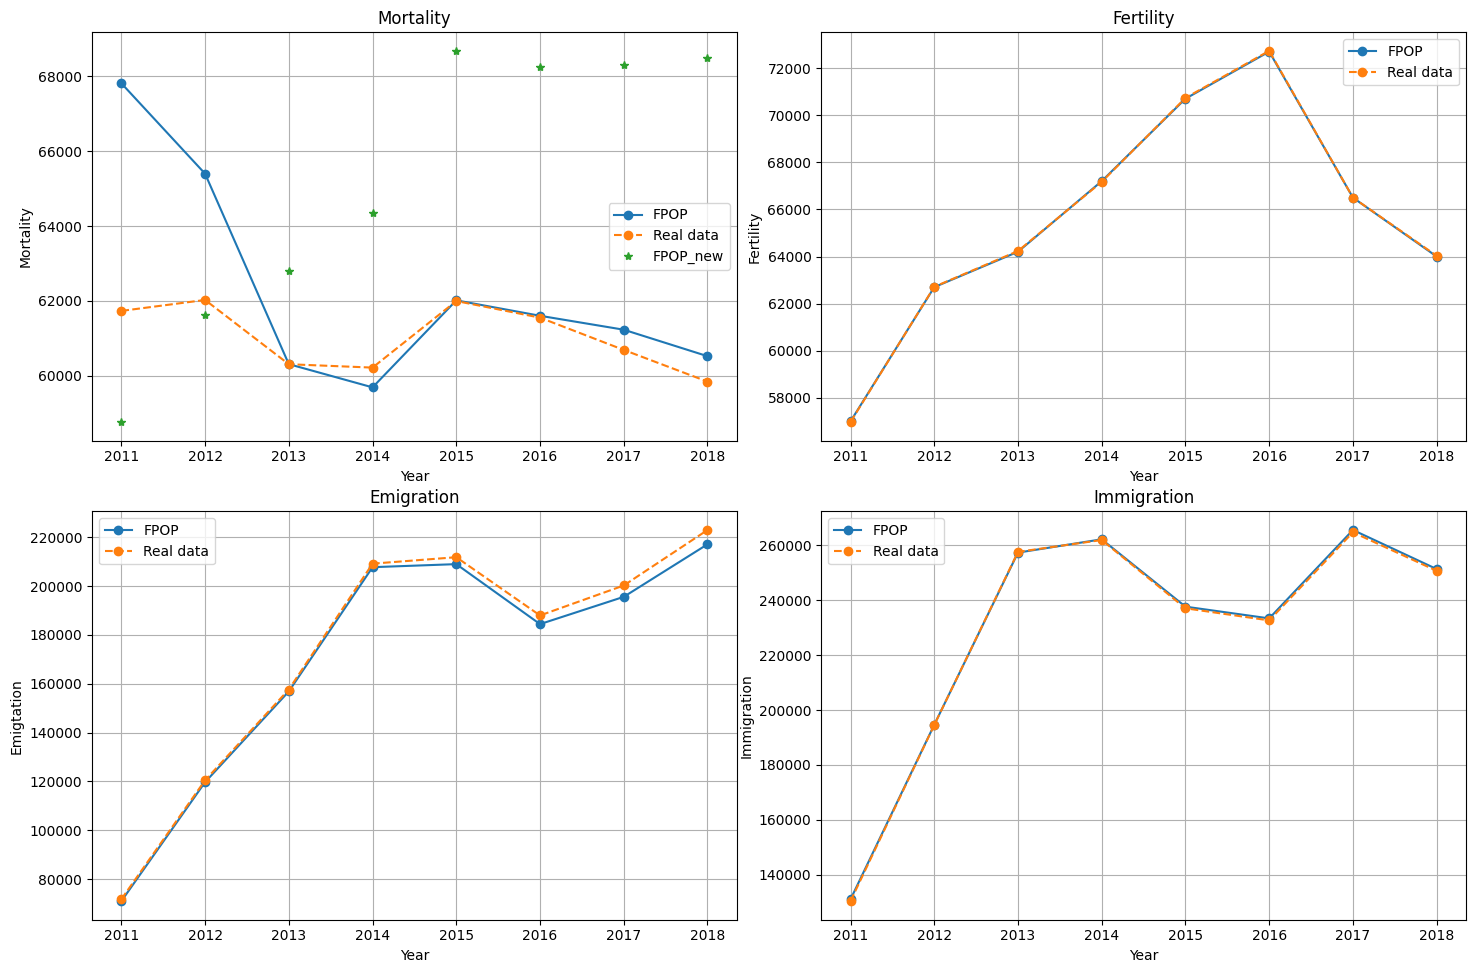

In [34]:


fig, axs = plt.subplots(2,2, figsize=(15,10))
fig.tight_layout(pad=3)

# axs[0, 0].plot(simulated_data['year'], simulated_data['population'], '-o')
# axs[0, 0].plot(simulated_data['year'], real_population, '--o')
# axs[0, 0].grid(True)
# axs[0, 0].set_title('Population')
# axs[0, 0].set_xlabel('Year')
# axs[0, 0].set_ylabel('Population')
# axs[0, 0].legend(["FPOP", "Real data"])


mortality = np.array([29382.484872, 30809.361547200002, 31397.261220800006, 
                      32170.400413599997, 34339.4683936, 34129.0705496, 
                      34154.73234960001, 34240.189113600005])*2
axs[0, 0].plot(simulated_data['year'], simulated_data['mortality'], '-o')
axs[0, 0].plot(simulated_data['year'], real_mortality, '--o')
axs[0, 0].plot(simulated_data['year'], mortality, '*')
axs[0, 0].grid(True)
axs[0, 0].set_title('Mortality')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('Mortality')
axs[0, 0].legend(["FPOP", "Real data", "FPOP_new"])


axs[0, 1].plot(simulated_data['year'], simulated_data['fertility'], '-o')
axs[0, 1].plot(simulated_data['year'], real_fertility, '--o')
axs[0, 1].grid(True)
axs[0, 1].set_title('Fertility')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Fertility')
axs[0, 1].legend(["FPOP", "Real data"])
axs[0, 1].grid(True)

axs[1, 0].plot(simulated_data['year'], simulated_data['emigration'], '-o')
axs[1, 0].plot(simulated_data['year'], real_emigration, '--o')
axs[1, 0].grid(True)
axs[1, 0].set_title('Emigration')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Emigtation')
axs[1, 0].legend(["FPOP", "Real data"])

axs[1, 1].plot(simulated_data['year'], simulated_data['immigration'], '-o')
axs[1, 1].plot(simulated_data['year'], real_immigration, '--o')
axs[1, 1].grid(True)
axs[1, 1].set_title('Immigration')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Immigration')
axs[1, 1].legend(["FPOP", "Real data"])




In [23]:
from sklearn.metrics import mean_absolute_percentage_error

MAPE_population = mean_absolute_percentage_error(real_population,simulated_data['population'])*100
print("MAPE for population: {} %".format(round(MAPE_population,2)))

MAPE_mortality = mean_absolute_percentage_error(real_mortality,simulated_data['mortality'])*100
print("MAPE for mortality: {} %".format(round(MAPE_mortality,2)))

MAPE_fertility = mean_absolute_percentage_error(real_fertility,simulated_data['fertility'])*100
print("MAPE for fertility: {} %".format(round(MAPE_fertility,2)))

MAPE_emigration = mean_absolute_percentage_error(real_emigration,simulated_data['emigration'])*100
print("MAPE for emigration: {} %".format(round(MAPE_emigration,2)))

MAPE_immigration = mean_absolute_percentage_error(real_immigration,simulated_data['immigration'])*100
print("MAPE for immigration: {} %".format(round(MAPE_immigration,2)))



MAPE for population: 0.53 %
MAPE for mortality: 2.29 %
MAPE for fertility: 0.04 %
MAPE for emigration: 1.39 %
MAPE for immigration: 0.23 %


In [24]:
def lagrange_new(x_interp: int, x_data, y_data, n=2):
        y_interp = 0
        for i in range(n+1):
            multiplication = 1
            for j in range(n+1):
                if (i != j):
                    multiplication *= (x_interp -
                                       x_data[j])/(x_data[i] - x_data[j])
            y_interp += (y_data[i]*multiplication)
        return y_interp
    
a = lagrange_new(3.5, [1,2,4], [4,10,28])

In [31]:
data_people = pd.read_csv("people_2010.txt", sep='\t', )
data_people.loc[data_people['age'] == 100]


,Unnamed: 0,sp_id,sp_hh_id,age,sex


Counter({16: 14292, 15: 5148, 14: 4543, 12: 1101, 13: 1071, 11: 891, 10: 685, 9: 447, 8: 321, 7: 304, 6: 274, 5: 156, 4: 73, 0: 43, 3: 20, 1: 9, 2: 6})
Counter({16: 26211, 15: 8677, 14: 6907, 12: 5404, 11: 4699, 13: 4339, 10: 3418, 9: 2258, 8: 1608, 7: 1476, 6: 1327, 5: 801, 4: 345, 0: 166, 3: 94, 1: 52, 2: 31})



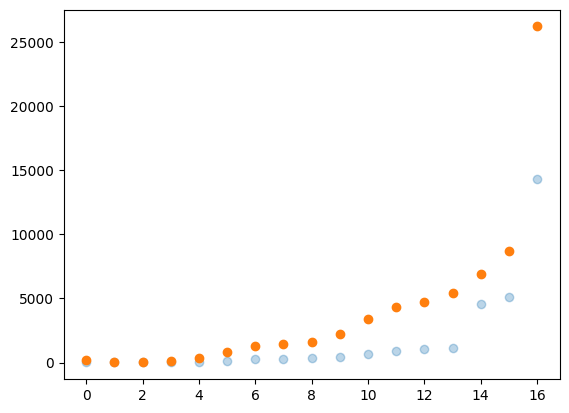

In [38]:
factor = [i for i in range(17)]
counter_new = [43, 9, 6, 20, 73, 156, 274, 304, 321, 447, 685, 891, 1071, 1101, 4543, 5148, 14292]
counter_old = [166, 52, 31, 94, 345, 801, 1327, 1476, 1608, 2258, 3418, 4339, 4699, 5404, 6907, 8677, 26211]

plt.scatter(factor, counter_new, alpha = 0.3)
plt.scatter(factor, counter_old)